In [36]:
import pymysql
import pandas as pd
from textblob import TextBlob
from langdetect import detect
from langdetect.lang_detect_exception import LangDetectException

In [37]:
# Establish connection
connection = pymysql.connect(
    host='localhost',
    user='root',
    password='saransh',
    database='amazon_reviews'
)

# Query data
query = "SELECT * FROM table1"
data = pd.read_sql(query, connection)

# Close connection
connection.close()


C:\Users\Administrator\AppData\Local\Temp\ipykernel_12776\3075744983.py:11: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  data = pd.read_sql(query, connection)


In [38]:
newdata=data.copy()

#copy the data of the dataframe into a new cell so that we have a whole new dataframe to do our cleaning of the data
#  and some other operations

In [39]:
newdata['review_title'] = newdata['review_title'].str.replace('\n', '')
#The data which we have gathered has \n in the end of it due to some error in the code, to remove it for better 
# sentiment analysis we are replacing the \n with ''

In [40]:
#cleaning the data : the reviews may contain some reviews in which either there are null values or some reviews
#  which are in other language than english, we remove such rows from the dataframe

def is_english(text):
    try:
        return detect(text) == 'en'
    except LangDetectException:
        return False
    
rows_to_drop=[]
    
for index, row in data.iterrows():
    if not (is_english(row['review_body'])):
        rows_to_drop.append(index)
    

# Drop rows from the DataFrame

newdata.drop(rows_to_drop, inplace=True)



In [41]:
data.shape

(90, 4)

In [44]:

newdata.shape

(81, 4)

In [43]:
newdata.dropna(subset=['review_title'], inplace=True)
newdata.dropna(subset=['review_body'], inplace=True)
newdata.dropna(subset=['review_rating'], inplace=True)

#removing all the rows which have null values, if there are any

In [27]:
#done with the data cleaning till the above cell
#-------------------------------------------------------------------------------

[10, 13, 20, 22, 41, 51, 67, 75, 84]

In [29]:
#is_english(data['review_title'][7])
data['review_body'][10]

''

In [31]:
data.head(11)

,id,review_title,review_rating,review_body
0,1,Best AC in affordable prize,5,"If you are looking for a complete package, the..."
1,2,Worst brand and worst service,1,Bought it for my Kerala home and thought Daiki...
2,3,High quality product from Daikin,4,The delivery was quick and the AC was delivere...
3,4,One of the best AC out there + excellent remote?,5,"If you are looking for a complete package, the..."
4,5,Best cooling,5,Since I am using this last 2months cooling is ...
5,6,Good cooling but fails on high temperatures. A...,3,Good ac. But I'm from Rajasthan and on extreme...
6,7,Cool AC,4,Bought this Daikin AC back in Jan 2024 for my ...
7,8,Daikin AC review,4,Pros: The product quality is good. Delivery wa...
8,9,Good,4,"Less machine noise , better cooling , user fri..."
9,10,Great cooling,4,Great cooling and value for money.


In [68]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')

import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('maxent_ne_chunker')
nltk.download('words')
nltk.download('vader_lexicon')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Administrator\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Administrator\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     C:\Users\Administrator\AppData\Roaming\nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to
[nltk_data]     C:\Users\Administrator\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\words.zip.


True

In [73]:
df1 =  newdata.copy()


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Administrator\AppData\Roaming\nltk_data...


True

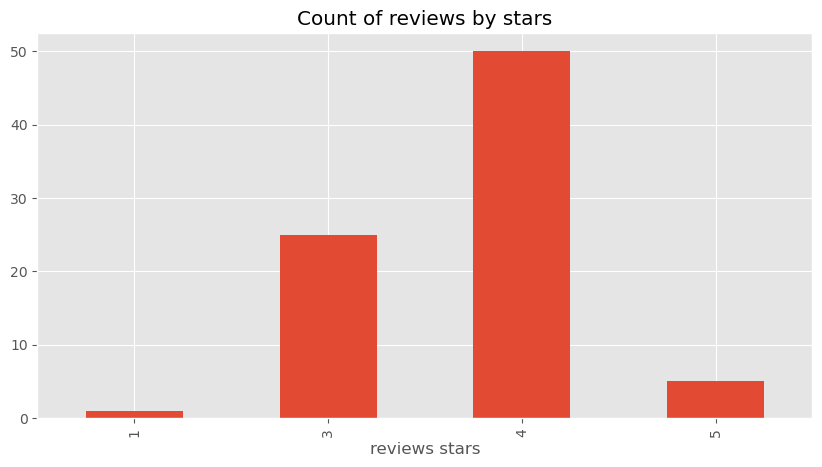

In [52]:
 ax = df1['review_rating'].value_counts().sort_index().plot(kind='bar', title='Count of reviews by stars', figsize=(10,5))

ax.set_xlabel('reviews stars')

plt.show()

In [53]:
example = df1['review_body'][50]
example

'Daikin is a reputed brand in Air conditioning however their after sales service is pathetic. I ordered 1.5 ton AC and no one came for installation for past 5 days. Their won’t be any quality issue but after sales service is poor.'

In [63]:
token = nltk.word_tokenize(example)
tagged=nltk.pos_tag(token)

tagged[:10]

[('Daikin', 'NNP'),
 ('is', 'VBZ'),
 ('a', 'DT'),
 ('reputed', 'JJ'),
 ('brand', 'NN'),
 ('in', 'IN'),
 ('Air', 'NNP'),
 ('conditioning', 'VBG'),
 ('however', 'RB'),
 ('their', 'PRP$')]

In [59]:
pip install nltk

Note: you may need to restart the kernel to use updated packages.


In [69]:
tagchunk=nltk.chunk.ne_chunk(tagged)
tagchunk.pprint()

(S
  (GPE Daikin/NNP)
  is/VBZ
  a/DT
  reputed/JJ
  brand/NN
  in/IN
  (GPE Air/NNP)
  conditioning/VBG
  however/RB
  their/PRP$
  after/IN
  sales/NNS
  service/NN
  is/VBZ
  pathetic/JJ
  ./.
  I/PRP
  ordered/VBD
  1.5/CD
  ton/NN
  (ORGANIZATION AC/NNP)
  and/CC
  no/DT
  one/NN
  came/VBD
  for/IN
  installation/NN
  for/IN
  past/JJ
  5/CD
  days/NNS
  ./.
  Their/PRP$
  won/VBD
  ’/NNP
  t/NN
  be/VB
  any/DT
  quality/JJ
  issue/NN
  but/CC
  after/IN
  sales/NNS
  service/NN
  is/VBZ
  poor/JJ
  ./.)


HERE STARTS THE REAL SENTIMENT ANALYSIS (VADER)

In [76]:
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm
sia = SentimentIntensityAnalyzer()

sia

In [77]:
sia.polarity_scores('I am very happy')

{'neg': 0.0, 'neu': 0.334, 'pos': 0.666, 'compound': 0.6115}

In [79]:
sia.polarity_scores(example)

{'neg': 0.184, 'neu': 0.816, 'pos': 0.0, 'compound': -0.7964}

In [100]:
res_title = {}
for i, row in tqdm(df1.iterrows(),total=len(df1)):
    title = row['review_title']
    myId = row['id']
    res_title[myId]= sia.polarity_scores(title)

  0%|          | 0/81 [00:00<?, ?it/s]

In [103]:
res_title = pd.DataFrame(res_title).T
res_title

,neg,neu,pos,compound
1,0.000,0.286,0.714,0.8176
2,0.732,0.268,0.000,-0.8481
3,0.000,1.000,0.000,0.0000
4,0.000,0.470,0.530,0.8360
5,0.000,0.192,0.808,0.6369
...,...,...,...,...
86,0.000,1.000,0.000,0.0000
87,0.000,0.000,1.000,0.5719
88,0.787,0.213,0.000,-0.5719
89,0.574,0.426,0.000,-0.4019


In [80]:
res_body = {}
for i, row in tqdm(df1.iterrows(),total=len(df1)):
    body = row['review_body']
    myId = row['id']
    res_body[myId]= sia.polarity_scores(body)


  0%|          | 0/81 [00:00<?, ?it/s]

In [ ]:
res_body = pd.DataFrame(res_body).T
res_body

In [98]:
vader=pd.DataFrame(res) 
vader=vader.T

vader = vader.reset_index().rename(columns={'index': 'id'})
vader = vader[['id','compound']].merge(df1,how='right')
vader = vader.rename(columns={'compound': 'vader_compound'})
vader['review_body'][1]

'Bought it for my Kerala home and thought Daikin is a know brand and I would like it. But, I was wrong. From day 1, the cooling of the AC is abominable. It starts slowly and reaches at around 90-97% compressor capacity and after a little time starts reducing its capacity and stays at 45-55% then after. Reported the issue to the company and they sent technician from some Giant Air System and they say that ambient temperature is high and that’s why it’s like that. I wonder that if 34 degrees ambient temperature is high for this AC, what would happen to people who buy it for Delhi or places like that? It’s been more than 25 days since I’ve registered the complaint and have called Giant Air Systems multiple times but till date they have not attended it.My suggestion would is people, don’t buy this brand. Their service is poor and you will regret your decision like I am right now.Update 14/03/24 - The guy (I think he is some senior tech guy from service team) visited on 13/02/24 and checked

In [99]:
sia.polarity_scores('Bought it for my Kerala home and thought Daikin is a know brand and I would like it. But, I was wrong. From day 1, the cooling of the AC is abominable. It starts slowly and reaches at around 90-97% compressor capacity and after a little time starts reducing its capacity and stays at 45-55% then after. Reported the issue to the company and they sent technician from some Giant Air System and they say that ambient temperature is high and that’s why it’s like that. I wonder that if 34 degrees ambient temperature is high for this AC, what would happen to people who buy it for Delhi or places like that? It’s been more than 25 days since I’ve registered the complaint and have called Giant Air Systems multiple times but till date they have not attended it.My suggestion would is people, don’t buy this brand. Their service is poor and you will regret your decision like I am right now.Update 14/03/24 - The guy (I think he is some senior tech guy from service team) visited on 13/02/24 and checked the system with gas pressure monitor and found nothing wrong with the gas pressure. It was around 140 when operating and he told me that it’s fine. Then apparently he flushed the gas a little bit and told me that sometimes it’s needed to do so to let the trapped air release from the system and it can help. He did check rest of the operations. He explained a lot of things and some key takeaways are-1. The display room temperature is always adjusted 2-3 degrees higher than the actual room temperature so that the machine could keep on working on keeping the room temperature to a comfortable levels when people open the doors or windows of that room for something.2. He taught me how without any equipment one can test and find that the AC gas pressure and other functions are ok. The method is - just go to the outdoor unit and check the pipe temperature of both in and out pipes and if they are somewhat similar in temperature, that means the rotation of the gas is perfect and there is no need to worry. On the other hand if there is a big variation in temperature of in and out pipes, one should ask the technician to come and check.3. Even if we set 18 degree as the required temperature for the room, it will never really reach that level in practical conditions. So, we must be ok with that as well and I think that’s fair enough.4. He asked me to keep the AC at 24 degrees preferably and that would give you the most comfortable room condition and I agree with him.5. These are smart ACs and they are designed to operate with minimal power consumption and hence you may find the load on compressor varying at times.He said sometimes the trapped air in the system can cause a bit issue with cooling but I am not sure how and if that air can be removed from the system when it is already mixed with the gas in compressor.First day of use after flushing it was better compared to previous days. The system didn’t drop performance and did some work to cool the room. At 24 degrees, it felt cool enough and I think it’s improved.Will share more after a few days of checking it. Increasing the rating from 1 star to 3 star for the well behaved technician from Giant air systems ( actually every technician who visited from Giant was well behaved and gentleman, it’s just my frustration with the delay in their response which got be cribbing about them ;) ha ha haa…)')

{'neg': 0.081, 'neu': 0.803, 'pos': 0.116, 'compound': 0.9697}